In [1]:
from datetime import datetime
import random
import io
import numpy as np
import pandas as pd
import chess.pgn
import matplotlib.pyplot as plt

import pprint
pp = pprint.PrettyPrinter(indent=4, width=120, compact=False)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
dataset = './data/games.csv'
df = pd.read_csv(dataset)
N, _ = df.shape
pp.pprint(df.shape)

df['moves'] = df['moves'].apply(lambda x: x.split())

df.sample(2)

(20058, 16)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
2948,U5llimcm,True,1.500430e+12,1.500430e+12,107,resign,white,10+6,dude_perfect,1234,jizzlin,1087,"[e4, a6, d4, Nc6, Nf3, f6, Bf4, g5, Bg3, d5, e...",B00,St. George Defense: Woodchuck Variation,4
15190,5701Gypj,False,1.492106e+12,1.492106e+12,91,mate,white,10+0,flafel26,1589,enitsap,1500,"[e4, d5, exd5, Qxd5, Nc3, Qd8, d4, e5, Nf3, Bb...",B01,Scandinavian Defense: Mieses-Kotroc Variation,4


## Statistics

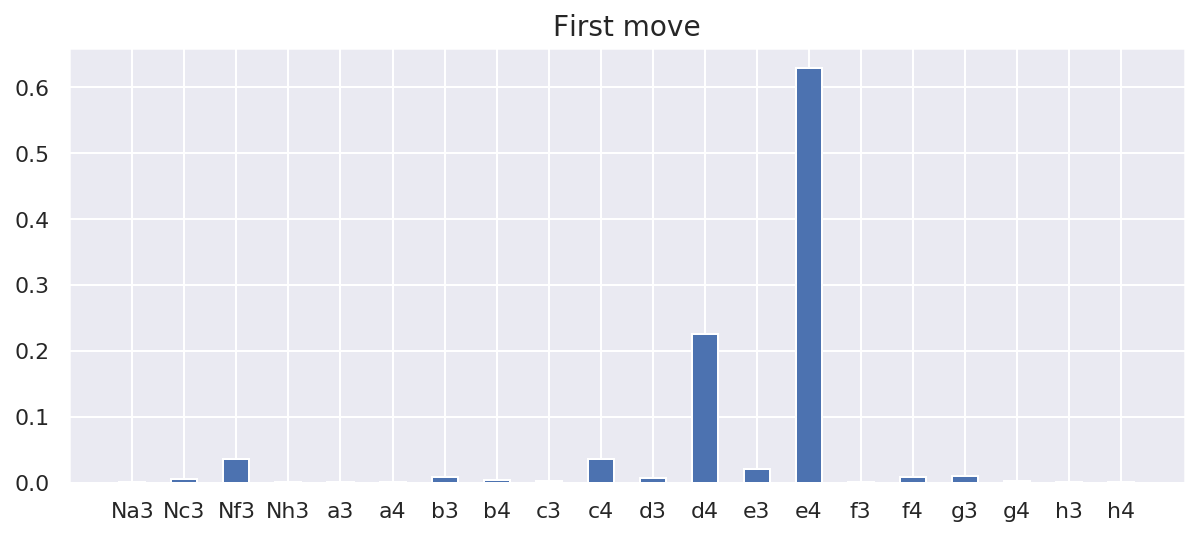

In [3]:
d = df['moves'].apply(lambda x: x[0])
uq = np.unique(d)
xs = [len(d[d == x])/len(d) for x in uq]

plt.figure(figsize=(10, 4))
plt.bar(uq, xs, width=0.5)
plt.title('First move', fontsize=14)
pass

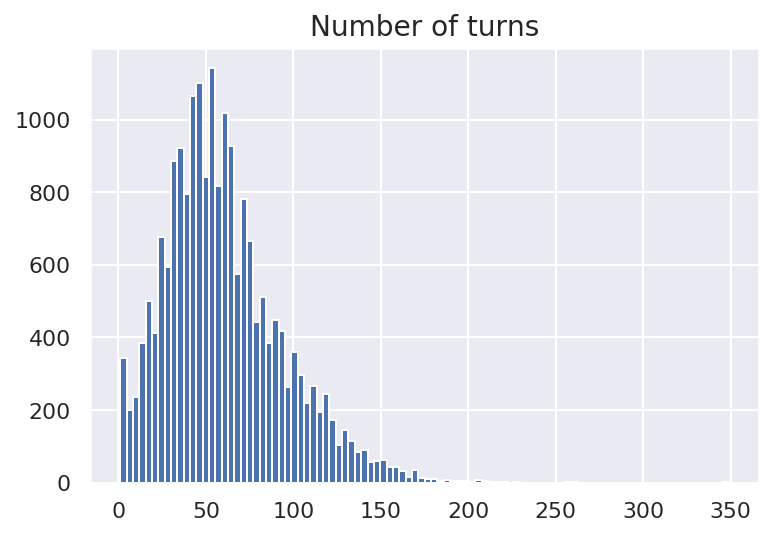

In [4]:
df['turns'].hist(bins=96)
plt.title('Number of turns', fontsize=14)
pass

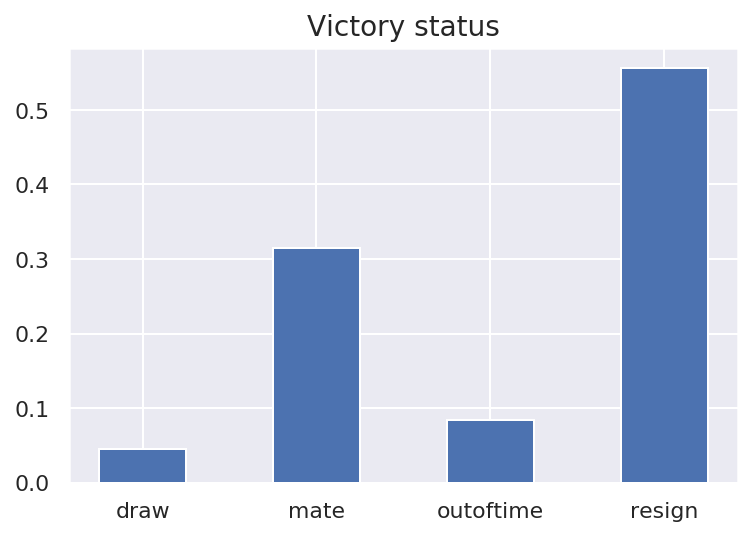

In [5]:
d = df['victory_status']
uq = np.unique(d)
xs = [len(d[d == x])/len(d) for x in uq]

plt.bar(uq, xs, width=0.5)
plt.title('Victory status', fontsize=14)
pass